In [5]:
import yaml
import sys
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

sys.path.append('../src/')
from functions_deep_learning import * 
from functions_plot import *

# Variables 

<font color='yellow'> labels: ['Not-COVID','COVID-19'] = [0,1] </font>

In [8]:
# Open the YAML configuration file
with open('../src/config.yaml', 'r') as file:
    cf = yaml.safe_load(file)

# Load images
main_path_test = cf["main_path_test"]
main_path_train = cf["main_path_train"]
main_path_val = cf["main_path_val"]

folders = cf["folders"]

#batch size
b_size = cf["b_size"]

# Save figures
figs_folder = cf["figs_folder"]

# Plot font size
font = cf["font"]

matplotlib.rc('font', **font)

# Exploratory Data Analysis

## Create DataFrames with images' information

In [11]:
df_train = create_df_with_images_paths_and_targets(main_path_train,folders).loc[:,["image","result"]]
df_val = create_df_with_images_paths_and_targets(main_path_val,folders).loc[:,["image","result"]]
df_test = create_df_with_images_paths_and_targets(main_path_test,folders).loc[:,["image","result"]]

df_train = df_train.rename(columns={'result':'label'})
df_val = df_val.rename(columns={'result':'label'})
df_test = df_test.rename(columns={'result':'label'})

df = pd.concat([df_train,df_val])
df = pd.concat([df,df_test])


df = df.reset_index(drop=True)

In [12]:
print("DF shape: ",df.shape)

df.head()

DF shape:  (33920, 2)


,image,label
0,"[[0.007843138, 0.011764706, 0.007843138, 0.007...",Not-COVID
1,"[[0.003921569, 0.02745098, 0.0627451, 0.039215...",Not-COVID
2,"[[0.7019608, 0.6392157, 0.43137255, 0.13725491...",Not-COVID
3,"[[0.11764706, 0.11764706, 0.11372549, 0.109803...",Not-COVID
4,"[[0.31764707, 0.44705883, 0.43529412, 0.435294...",Not-COVID


In [13]:
print("Min pixel value of random image: ", df.loc[0,'image'].min())

Min pixel value of random image:  0.0


In [14]:
print("Max pixel value of random image: ", df.loc[0,'image'].max())

Max pixel value of random image:  0.9764706


## Positive and negative COVID-19 cases distribution

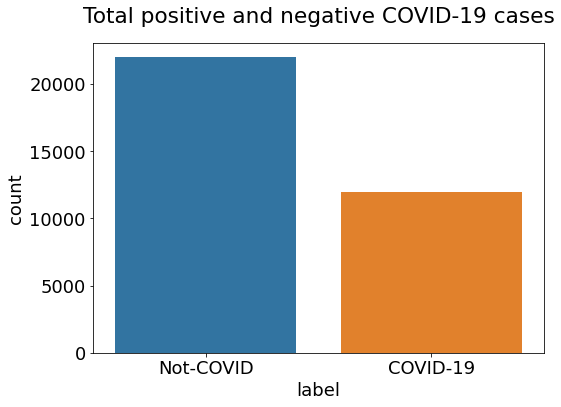

In [15]:
#Arrumar essas imagens de count, estao sendo salvas cortadas.

plt.figure(figsize=(8,6))
fig = sns.countplot(x='label',data=df)
plt.title("Total positive and negative COVID-19 cases",pad=20)
plt.tight_layout()
plt.show()
fig.figure.savefig(figs_folder + 'total_cases_count.png')  

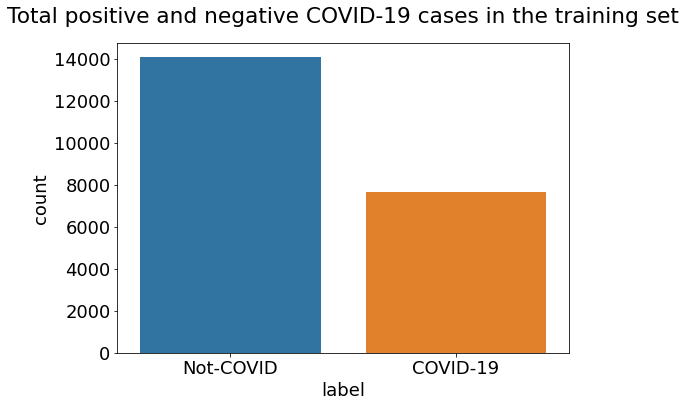

In [18]:
plt.figure(figsize=(8,6))
fig = sns.countplot(x='label',data=df_train)
plt.title("Total positive and negative COVID-19 cases in the training set",pad=20)
plt.tight_layout()
plt.show()
fig.figure.savefig(figs_folder + 'train_cases_count.png')  

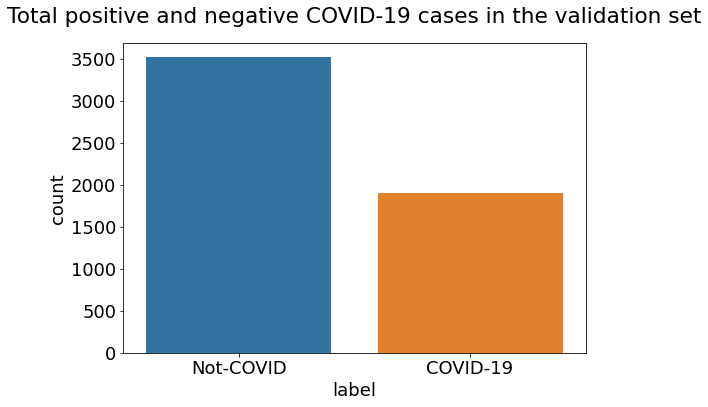

In [19]:
plt.figure(figsize=(8,6))
fig = sns.countplot(x='label',data=df_val)
plt.title("Total positive and negative COVID-19 cases in the validation set",pad=20)
plt.tight_layout()
plt.show()
fig.figure.savefig(figs_folder + 'val_cases_count.png')  

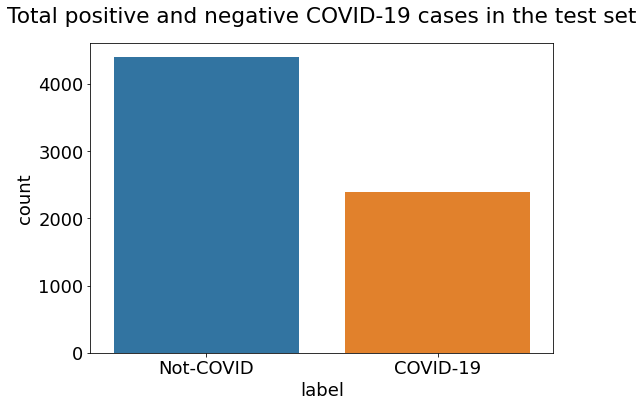

In [21]:
plt.figure(figsize=(8,6))
fig = sns.countplot(x='label',data=df_test)
plt.title("Total positive and negative COVID-19 cases in the test set",pad=20)
plt.tight_layout()
plt.show()
fig.figure.savefig(figs_folder + 'test_cases_count.png')  

# Plot sample images from the training set

## Create image generators

In [22]:
image_gen_aug = get_ImageDataGenerator_augmented()
image_gen = get_ImageDataGenerator()

In [23]:
train_generator = get_generator(image_gen,main_path_train,folders,256,b_size,True,1)

# Define the input_shape
batch = next(train_generator)
batch_images = np.array(batch[0])
batch_labels = np.array(batch[1])

print("Sparse labels (classes), where 0 = Not-Covid, 1 = COVID-19\n",np.array(batch[1][:5]).astype(int))

input_shape = batch_images[0].shape
print("Input Shape: ",input_shape)

Found 21715 images belonging to 2 classes.
Sparse labels (classes), where 0 = Not-Covid, 1 = COVID-19
 [0 1 1 0 1]
Input Shape:  (256, 256, 1)


## Plot Unaugmented Images

Found 21715 images belonging to 2 classes.


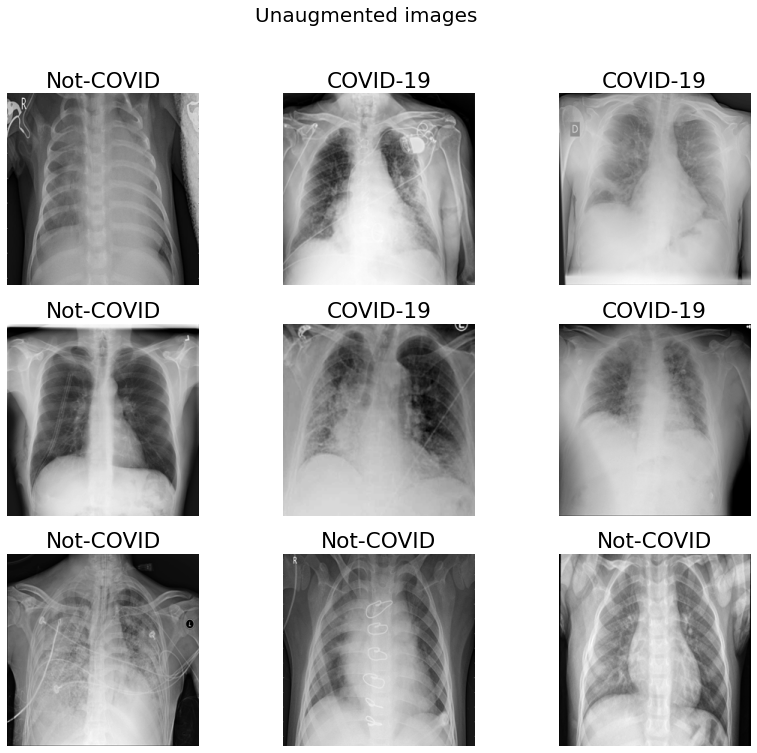

In [24]:
# Reset train generator
train_generator = get_generator(image_gen,main_path_train,folders,256,b_size,True,1)

batch = next(train_generator)
batch_images = np.array(batch[0])
batch_labels = np.array(batch[1])

title = "Unaugmented images"
path_fig = figs_folder + 'unaug_'

plot_sample_images(folders,batch_images,batch_labels,title,path_fig,True)

## Plot Augmented Images - Augmentation applied at random

Found 21715 images belonging to 2 classes.


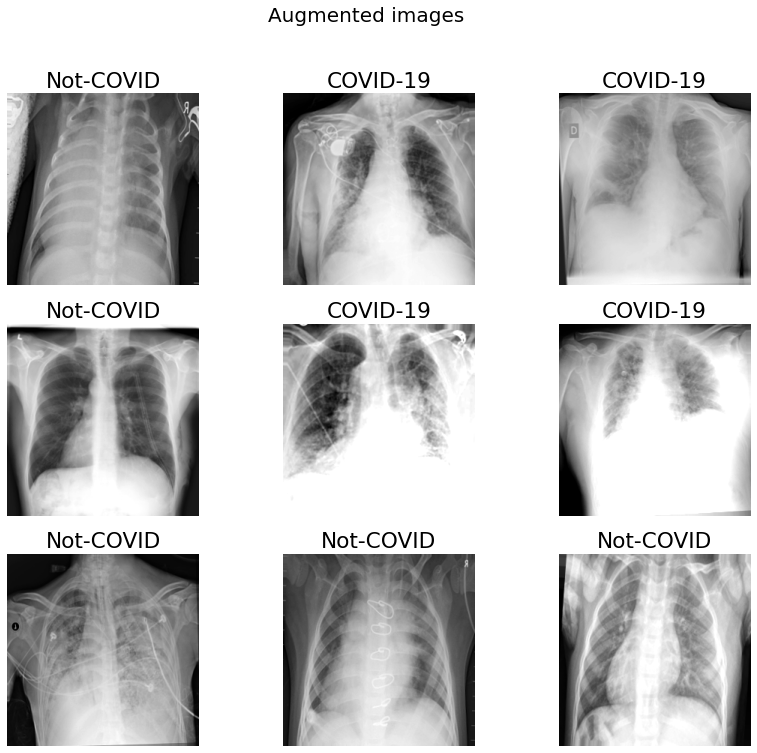

In [25]:
train_generator_aug = get_generator(image_gen_aug,main_path_train,folders,256,b_size,True,1)

batch = next(train_generator_aug)
batch_images = np.array(batch[0])
batch_labels = np.array(batch[1])

title = "Augmented images"
path_fig = figs_folder + 'aug_'

plot_sample_images(folders,batch_images,batch_labels,title,path_fig,True)

## Plot Augmented version of the same image - selecting the parameters

Found 21715 images belonging to 2 classes.
Batch images shape:  (32, 256, 256, 1)
Image shape:  (256, 256, 1)


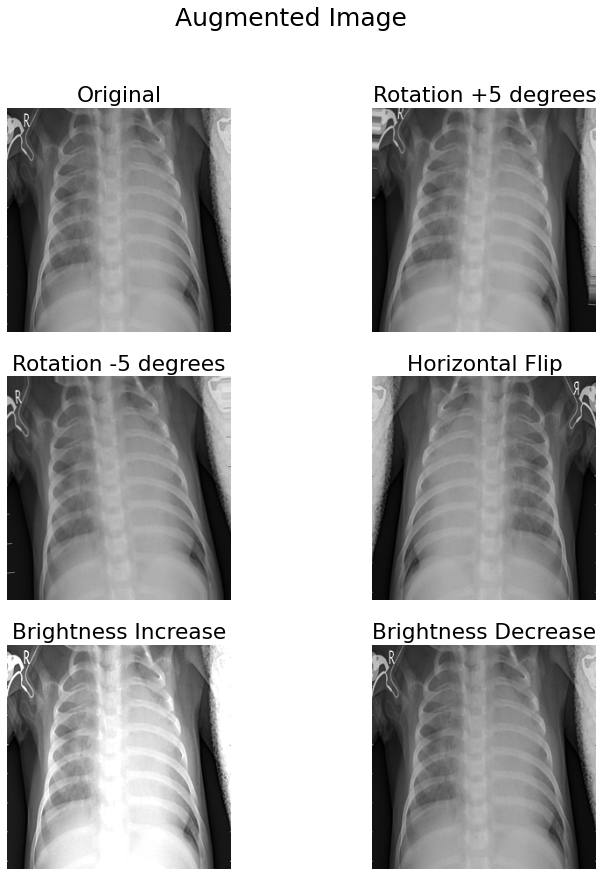

In [26]:
train_generator = get_generator(image_gen,main_path_train,folders,256,b_size,True,1)

batch = next(train_generator)
batch_images = np.array(batch[0])
batch_labels = np.array(batch[1])

img = batch_images[0,:,:,:]

  
print("Batch images shape: ",batch_images.shape)
print("Image shape: ",img.shape)
print("Label: ", batch_labels[0])

datagen = ImageDataGenerator()
img_labels = ["Original","Rotation +5 degrees","Rotation -5 degrees","Horizontal Flip","Brightness Increase","Brightness Decrease"]
img_batch = []

img_batch.append(datagen.apply_transform(x=img,transform_parameters={'theta':0}))
img_batch.append(datagen.apply_transform(x=img, transform_parameters={'theta':5}))
img_batch.append(datagen.apply_transform(x=img, transform_parameters={'theta':-5}))
img_batch.append(datagen.apply_transform(x=img, transform_parameters={'flip_horizontal':True}))
img_batch.append(datagen.apply_transform(x=img, transform_parameters={'brightness':1.5}))
img_batch.append(datagen.apply_transform(x=img, transform_parameters={'brightness':0.5}))

fig = plt.figure(figsize=(12,14))
plt.suptitle("Augmented Image", fontsize=25)

for i in range(6):
    ax = plt.subplot(3,2,i+1)
    plt.imshow(img_batch[i], cmap='gray')
    plt.title(img_labels[i])
    plt.axis('off')
        
plt.show()
fig.savefig(figs_folder + 'same_image_augmented.png')      

## Image Intensity Distribution

In [27]:
img_means = []
img_maxs = []
img_mins = []
img_stds = []

col_names = ["min","max","mean","std"]
for i in range(df.shape[0]):
    img_mins.append(np.min(df.loc[i,"image"]))
    img_maxs.append(np.max(df.loc[i,"image"]))
    img_means.append(np.mean(df.loc[i,"image"]))
    img_stds.append(np.std(df.loc[i,"image"]))
    
df_aux = pd.DataFrame(np.column_stack((img_mins,img_maxs,img_means,img_stds)),columns=col_names) 
print(df_aux.shape)
print(df_aux.head())

df_info = pd.concat([df,df_aux],axis=1)
print(df_info.shape)
print(df_info.head())

(33920, 4)
        min       max      mean       std
0  0.000000  0.976471  0.520174  0.259978
1  0.000000  0.964706  0.673769  0.210966
2  0.000000  1.000000  0.365235  0.271739
3  0.003922  0.996078  0.628174  0.218622
4  0.000000  1.000000  0.524008  0.217174
(33920, 6)
                                               image      label       min  \
0  [[0.007843138, 0.011764706, 0.007843138, 0.007...  Not-COVID  0.000000   
1  [[0.003921569, 0.02745098, 0.0627451, 0.039215...  Not-COVID  0.000000   
2  [[0.7019608, 0.6392157, 0.43137255, 0.13725491...  Not-COVID  0.000000   
3  [[0.11764706, 0.11764706, 0.11372549, 0.109803...  Not-COVID  0.003922   
4  [[0.31764707, 0.44705883, 0.43529412, 0.435294...  Not-COVID  0.000000   

        max      mean       std  
0  0.976471  0.520174  0.259978  
1  0.964706  0.673769  0.210966  
2  1.000000  0.365235  0.271739  
3  0.996078  0.628174  0.218622  
4  1.000000  0.524008  0.217174  


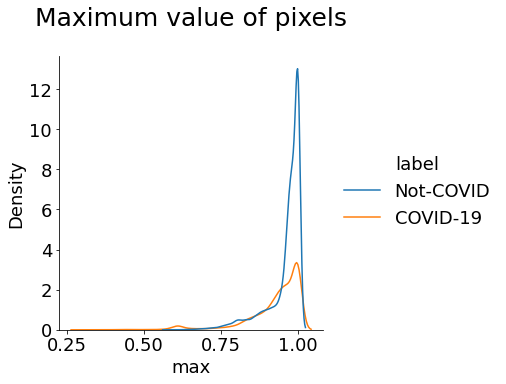

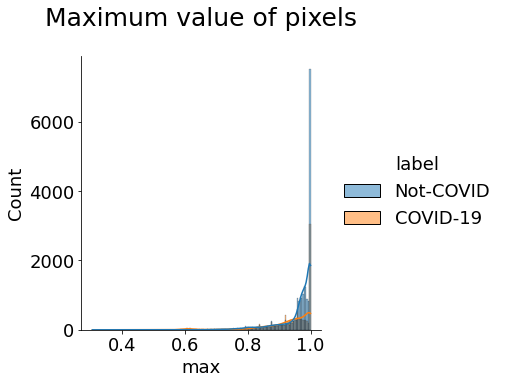

In [45]:
fig = sns.displot(data=df_info,x="max",hue="label",kind="kde")
plt.title("Maximum value of pixels",pad=30, size=25)
plt.show()
fig.savefig(figs_folder + 'image_density_distribution_max.png') 


fig = sns.displot(data=df_info,x="max",hue="label",kind="hist", kde=True)
plt.title("Maximum value of pixels",pad=30, size=25)
plt.show()
fig.savefig(figs_folder + 'image_histogram_distribution_max.png')  

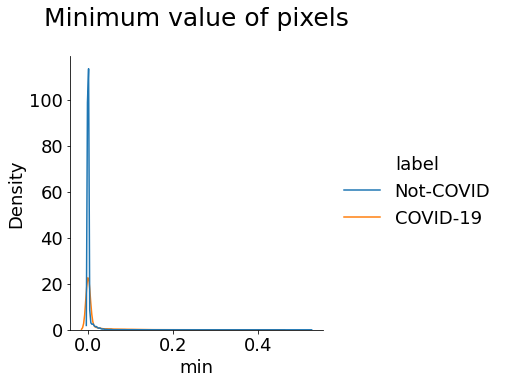

In [31]:
fig = sns.displot(data=df_info,x="min",hue="label",kind="kde")
plt.title("Minimum value of pixels",pad=30, size=25)
plt.show()
fig.savefig(figs_folder + 'image_density_distribution_min.png')  

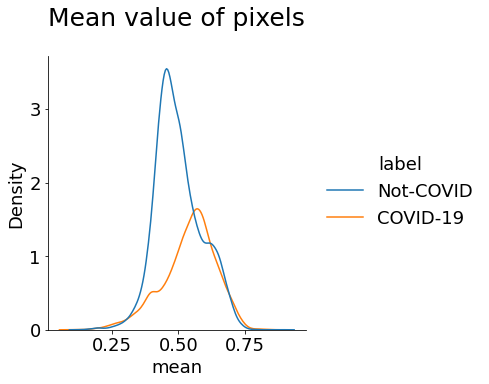

In [33]:
fig = sns.displot(data=df_info,x="mean",hue="label",kind="kde")
plt.title("Mean value of pixels",pad=30, size=25)
plt.show()
fig.savefig(figs_folder + 'image_density_distribution_mean.png')  

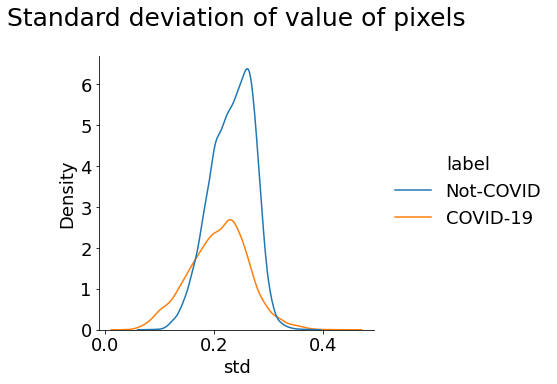

In [34]:
fig = sns.displot(data=df_info,x="std",hue="label",kind="kde")
plt.title("Standard deviation of value of pixels",pad=30, size=25)
plt.show()
fig.savefig(figs_folder + 'image_density_distribution_std.png')  

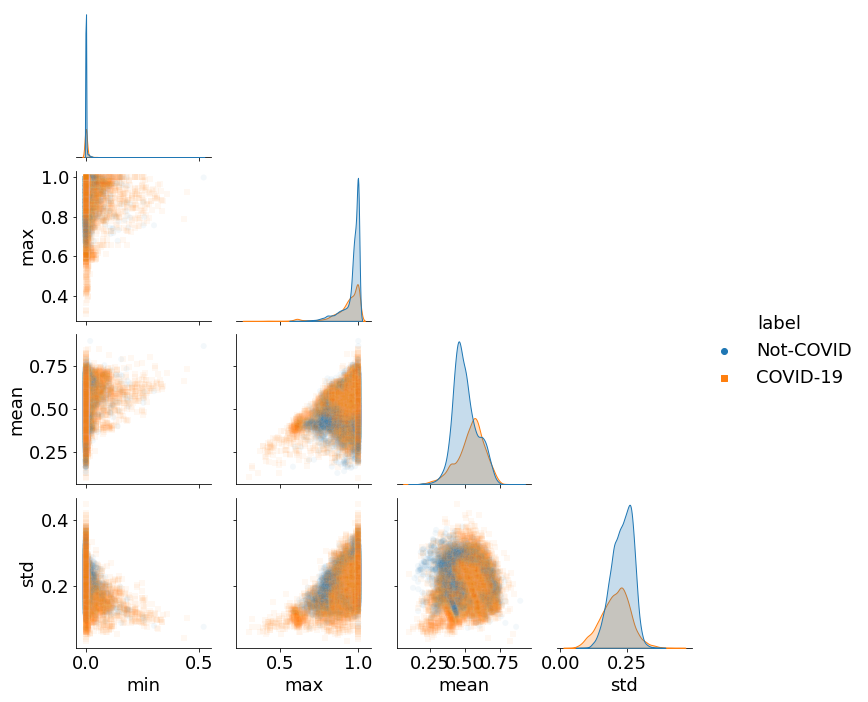

In [44]:
fig = sns.pairplot(df_info.drop(columns="image"),hue='label', markers = ['o','s'],
             corner=True, diag_kind ='kde', plot_kws={'alpha': 0.05})
#fig.fig.suptitle("Pairplot of images' metrics", size=25, y=1.00)
plt.show()
fig.savefig(figs_folder + 'image_distribution_pairplot.png')  